## Keras layered model: RNN

## Table of Contents

#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping for modeling
#### 4. Data Split
#### 5. Creating Keras Model
#### 6. Creating Confusion Matrix

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define path
path = r'C:\Users\Lukman\Desktop\FEMINA CF\Machine Learning\Datasets'

In [3]:
# Import data
climate = pd.read_csv(os.path.join(path, 'climate_cleaned.csv'))
climate

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6,8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4,2,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9,0,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4,2,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1,1,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [4]:
#Read in the pleasant weather data.
df = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Wrangling

In [5]:
# drop date column
df.drop(columns = 'DATE', inplace = True)

In [6]:
df.shape

(22950, 15)

## 3. Reshaping for modeling¶

In [7]:
X = pd.read_csv(os.path.join(path, 'climate_cleaned.csv'), index_col = False)

In [8]:
X.shape

(22950, 135)

In [9]:
y=df

In [10]:
# Turn X and y to arrays

X = np.array(X)
y = np.array(y)

In [11]:
X = X.reshape(-1,15,9)
X

array([[[  7.    ,   0.85  ,   1.018 , ...,   6.5   ,   0.8   ,
          10.9   ],
        [  1.    ,   0.81  ,   1.0195, ...,   3.7   ,  -0.9   ,
           7.9   ],
        [  4.    ,   0.67  ,   1.017 , ...,   2.4   ,  -0.4   ,
           5.1   ],
        ...,
        [  4.    ,   0.73  ,   1.0304, ...,  -5.9   ,  -8.5   ,
          -3.2   ],
        [  5.    ,   0.98  ,   1.0114, ...,   4.2   ,   2.2   ,
           4.9   ],
        [  5.    ,   0.88  ,   1.0003, ...,   8.5   ,   6.    ,
          10.9   ]],

       [[  6.    ,   0.84  ,   1.018 , ...,   6.1   ,   3.3   ,
          10.1   ],
        [  6.    ,   0.84  ,   1.0172, ...,   2.9   ,   2.2   ,
           4.4   ],
        [  4.    ,   0.67  ,   1.017 , ...,   2.3   ,   1.4   ,
           3.1   ],
        ...,
        [  6.    ,   0.97  ,   1.0292, ...,  -9.5   , -10.5   ,
          -8.5   ],
        [  5.    ,   0.62  ,   1.0114, ...,   4.    ,   3.    ,
           5.    ],
        [  7.    ,   0.91  ,   1.0007, ...,   8.

## 4. Split the data


In [12]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212, 15)
(5738, 15, 9) (5738, 15)


## 5. Creating Keras Model

In [ ]:
epochs = 15
batch_size = 16
n_hidden = 32

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = len(y_train[0])

model = Sequential()
model.add(SimpleRNN(64, input_shape=(15, 9), activation='tanh'))
model.add(Dense(15, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.TruePositives(name='tp'),
keras.metrics.FalsePositives(name='fp'),
keras.metrics.TrueNegatives(name='tn'),
keras.metrics.FalseNegatives(name='fn'),
keras.metrics.BinaryAccuracy(name='accuracy'),
keras.metrics.Precision(name='precision'),
keras.metrics.Recall(name='recall'),
keras.metrics.AUC(name='auc')])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                4736      
                                                                 
 dense_3 (Dense)             (None, 15)                975       
                                                                 
Total params: 5,711
Trainable params: 5,711
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/20
1076/1076 - 4s - loss: 0.3092 - tp: 1065.0000 - fp: 416.0000 - tn: 201959.0000 - fn: 54740.0000 - accuracy: 0.7864 - precision: 0.7191 - recall: 0.0191 - auc: 0.7278 - 4s/epoch - 3ms/step
Epoch 2/20
1076/1076 - 2s - loss: 0.2438 - tp: 2967.0000 - fp: 1131.0000 - tn: 201244.0000 - fn: 52838.0000 - accuracy: 0.7910 - precision: 0.7240 - recall: 0.0532 - auc: 0.7754 - 2s/epoch - 2ms/step
Epoch 3/20
1076/1076 - 2s - loss: 0.2233 - tp: 3893.0000 - fp: 1720.0000 - tn: 200655.0000 - fn: 51912.0000 - accuracy: 0.7923 - precision: 0.6936 - recall: 0.0698 - auc: 0.7790 - 2s/epoch - 2ms/step
Epoch 4/20
1076/1076 - 2s - loss: 0.2080 - tp: 4279.0000 - fp: 2117.0000 - tn: 200258.0000 - fn: 51526.0000 - accuracy: 0.7922 - precision: 0.6690 - recall: 0.0767 - auc: 0.7874 - 2s/epoch - 2ms/step
Epoch 5/20
1076/1076 - 2s - loss: 0.1951 - tp: 4556.0000 - fp: 2252.0000 - tn: 200123.0000 - fn: 51249.0000 - accuracy: 0.7928 - precision: 0.6692 - recall: 0.0816 - auc: 0.7909 - 2s/epoch - 2ms/step
E

## 6. Creating Confusion Matrix

In [17]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'

}

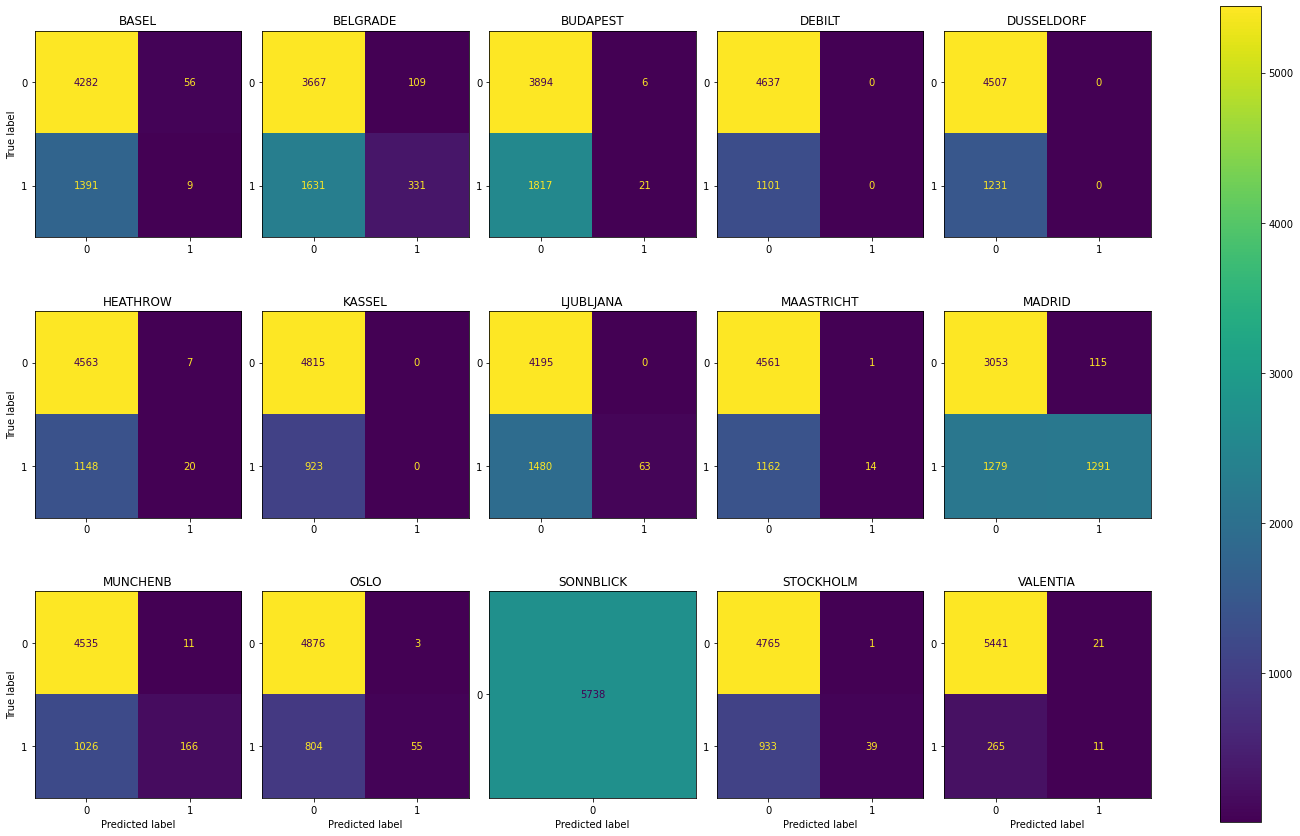

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


# Assuming model has been trained and X_test, y_test are defined
scores = model.predict(X_test)

# Rounding the predicted scores to binary values (0 or 1)
lst = []
for n in range(len(scores)):
    lst.append([int(round(elem, 0)) for elem in list(scores[n])])

lst = np.array(lst)

# Setting up the subplots for multiple confusion matrices
f, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()

for i in range(15):
    if i == 12:
        labels = [0]  # If you expect only one label (class 0)
    else:
        labels = [0, 1]  # For binary classification (classes 0 and 1)
    
    # Plotting the confusion matrix for each class
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test[:, i], lst[:, i]),
                                  display_labels=labels)
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(stations[i])
    
    if i < 10:
        disp.ax_.set_xlabel('')  # Remove x-label for the top 2 rows
    if i % 5 != 0:
        disp.ax_.set_ylabel('')  # Remove y-label for non-leftmost columns
    disp.im_.colorbar.remove()  # Remove individual colorbars to avoid overlap

# Adjust the spacing between plots and add a global colorbar
plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
